## ML - USU

> Notes on course by Predram Jahangiry: https://www.youtube.com/playlist?list=PL2GWo47BFyUNeLIH127rVovSqKFm1rk07

---


- Regression diagnostics: https://www.statsmodels.org/stable/examples/notebooks/generated/regression_diagnostics.html#

- 

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf # (For econometrics approach we use statsmodels package)

sns.set()  #if you want to use seaborn themes with matplotlib functions

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_pickle("./data/wage_clean.pkl")
df.head()

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc
0,76900.0,40.0,93.0,12.0,11.0,2.0,31.0,1,0,8.0
1,80800.0,50.0,119.0,18.0,11.0,16.0,37.0,1,0,14.0
2,82500.0,40.0,108.0,14.0,11.0,9.0,33.0,1,0,14.0
3,65000.0,40.0,96.0,12.0,13.0,7.0,32.0,1,0,12.0
4,56200.0,40.0,74.0,11.0,14.0,5.0,34.0,1,0,6.0


In [4]:
# pay attention to the data types. If you were importing a csv file, you must have converted marreid and black into categorical variabls again!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   wage     935 non-null    float64 
 1   hours    935 non-null    float64 
 2   IQ       935 non-null    float64 
 3   educ     935 non-null    float64 
 4   exper    935 non-null    float64 
 5   tenure   935 non-null    float64 
 6   age      935 non-null    float64 
 7   married  935 non-null    category
 8   black    935 non-null    category
 9   meduc    935 non-null    float64 
dtypes: category(2), float64(8)
memory usage: 60.4 KB


In [5]:
df.describe()

,wage,hours,IQ,educ,exper,tenure,age,meduc
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,95794.545455,43.929412,101.282353,13.468449,11.563636,7.234225,33.080214,10.792513
std,40436.082247,7.224256,15.052636,2.196654,4.374586,5.075206,3.107803,2.752407
min,11500.000000,20.000000,50.000000,9.000000,1.000000,0.000000,28.000000,0.000000
25%,66900.000000,40.000000,92.000000,12.000000,8.000000,3.000000,30.000000,9.000000
50%,90500.000000,40.000000,102.000000,12.000000,11.000000,7.000000,33.000000,12.000000
75%,116000.000000,48.000000,112.000000,16.000000,15.000000,11.000000,36.000000,12.000000
max,307800.000000,80.000000,145.000000,18.000000,23.000000,22.000000,38.000000,18.000000


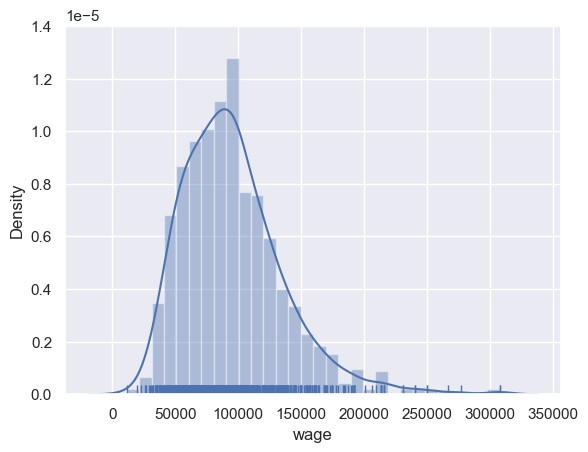

In [6]:
sns.distplot(df['wage'], bins=30, rug=True)
plt.show()

*Exercise*:

1. What do you learn by comparing the mean and median for wage?

Since there are a few outliers mean will be > median as we see from the code

2. Which of the OLS assumptions is violated? What's the implication for econometrics linear regression analysis?

Does the distribution of "wage" in my sample dataset need to be normal for me to apply linear regression models?

No, the distribution of the dependent variable (wage in this case) does not need to be normal for you to apply linear regression models like ordinary least squares (OLS) regression. Here are a few key points about applying linear regression when the dependent variable is non-normal:

- OLS regression relies on certain assumptions about the error terms (residuals), not the dependent variable itself. It assumes the errors are independently and identically distributed according to a normal distribution.

- If the error terms are normally distributed, OLS regression will give you unbiased estimates of the regression coefficients and correct inference (p-values, confidence intervals, etc), even if the dependent variable is non-normal.

- However, non-normality of the dependent variable can affect the validity of the normality assumption of the errors. Extreme skewness or outliers in the dependent variable make it more likely for the errors to be non-normal.

- There are ways to deal with non-normal dependent variables in regression: data transformation (e.g. log transforming skewed data), robust regression methods (less sensitive to non-normal errors), bootstrapping (does not require normality assumptions).

So in summary, you can apply OLS regression even if wage is non-normal. But you should check the distribution of wage to see if any data transformation or robust methods are warranted to ensure valid results. Assessing the model residuals is also recommended.


Here is an example of how non-normality of the dependent variable can lead to non-normal errors:

Let's say your wage data is extremely right skewed - the majority of people have low to medium wages, but there are a few very high wage outliers. When you fit an OLS regression model, it tries to fit a line through all the data points to minimize the residuals.

But with that skewed wage distribution, what can happen is the outliers with very high wages have large positive residuals, while the majority of points at lower wages have small negative residuals. This makes the error distribution right skewed as well, rather than normal.

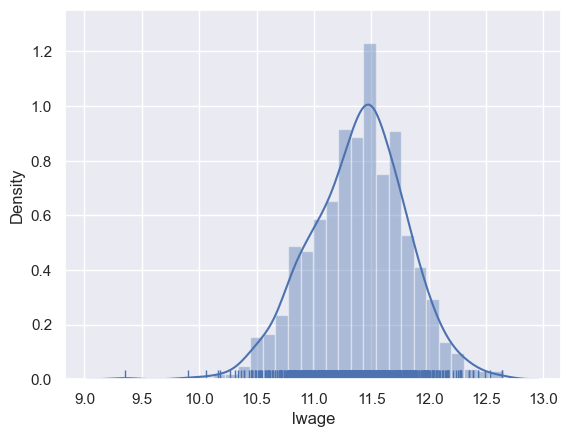

In [7]:
# Need to do log transformation to avoid potential heteroskedasticity.
df['lwage']= np.log(df['wage'])
sns.distplot(df['lwage'], bins=30 , rug=True)
plt.show()

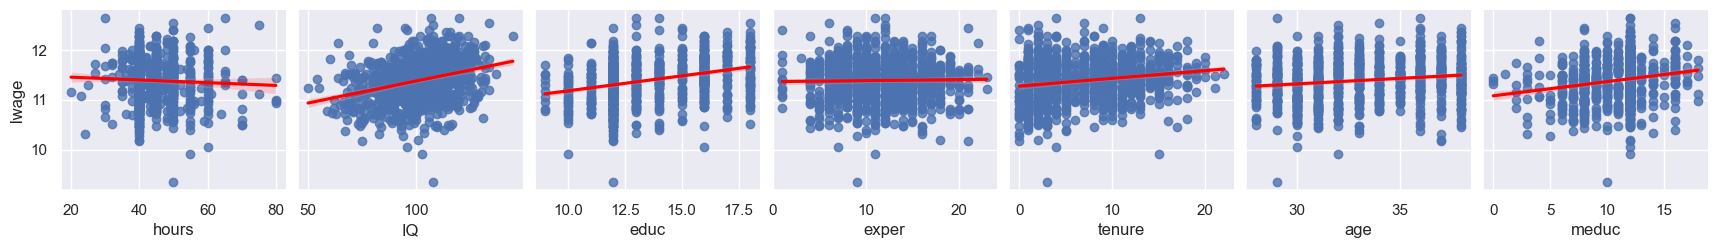

In [14]:
sns.pairplot(data=df, x_vars=['hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'meduc'], y_vars=["lwage"],
             kind="reg",  plot_kws={'line_kws':{'color':'red'}})
plt.show()

### Multiple Regression Models with Statsmodel.formula api:

> https://www.statsmodels.org/dev/example_formulas.html

The R-style formula API is v useful when we want to experiment with feature engg as we do not have to
construct the design matrix everytime

In [15]:
reg1 = smf.ols(formula="lwage ~ IQ + educ", data=df).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     69.42
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           7.88e-29
Time:                        13:32:09   Log-Likelihood:                -452.72
No. Observations:                 935   AIC:                             911.4
Df Residuals:                     932   BIC:                             926.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2635      0.096    106.643      0.000      10.075      10.452
IQ             0.0059      0.001      5.875      0.000       0.004       0.008
educ           0.0391      0.007      5.721      0.000       0.026       0.053
==============================================================================
Omnibus:                       35.757   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.770
Skew:                          -0.376   Prob(JB):                     4.23e-11
Kurtosis:                       3.813   Cond. No.                         773.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- p values of coeffs are stat significant (but remember this story only holds when assumptions are valid)

- here we are only considering IQ and edu so the assumption that the error term does not consit of any feature that is correlated with iq or educ is highly unlikelty - so __mist probably these coeffs are invalid__


Interpretation:

Remember the dependent var is log transformed

```
log(y) = beta_0 + beta_1.x1

dy/y = beta_1

dy*100/y = beta_1* 100 = % change in y
```

1 yr inc in educ - inc wage by 3.9% - again, this might be fake significance

### Check for Homoscedasticity

- Residuals should have constant variance across the regression line.


In [16]:
reg1.fittedvalues

0      11.278168
1      11.665329
2      11.444355
3      11.295757
4      11.127648
         ...    
930    11.352564
931    11.370056
932    11.184358
933    11.371978
934    11.360252
Length: 935, dtype: float64

Text(0, 0.5, 'Residuals')

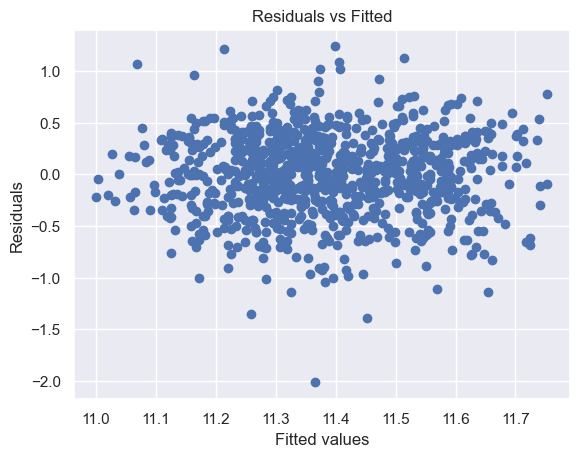

In [20]:
import matplotlib.pyplot as plt

# Plot residuals vs fitted values
fig, ax = plt.subplots()
ax.scatter(reg1.fittedvalues, reg1.resid)
ax.set_title('Residuals vs Fitted')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')


Examine this plot visually. If residuals have equal spread across the fitted values, then homoscedasticity assumption holds. Any funnel shape or unequal spread indicates heteroscedasticity.



### Normally distributed errors

Histogram or Q-Q plot of residuals should look approximately normal.


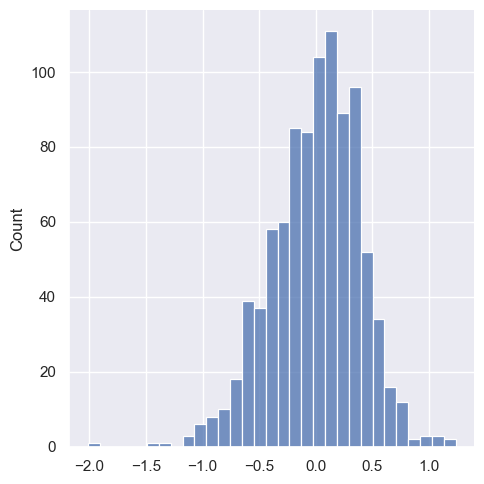

In [22]:
sns.displot(reg1.resid);

### Include categorical variables

In [23]:
df.dtypes

wage        float64
hours       float64
IQ          float64
educ        float64
exper       float64
tenure      float64
age         float64
married    category
black      category
meduc       float64
lwage       float64
dtype: object

In [25]:
# motivation:
df.groupby(by=['married', 'black']).mean().round(1)

wage  hours     IQ  educ  exper  tenure   age  meduc  lwage
married black                                                                 
0       0       84197.6   43.5  105.2  14.1    9.8     6.7  32.0   11.1   11.3
        1       60011.1   42.1   86.8  12.8   11.9     3.9  32.8   10.4   11.0
1       0      100728.0   44.3  103.3  13.6   11.7     7.5  33.3   11.0   11.4
        1       75979.4   41.9   85.9  12.4   12.2     6.6  32.8    9.3   11.2

there seems to be some corr b/w the categorical vars and the wage

In [24]:
reg2 = smf.ols(formula="np.log(wage) ~ IQ + educ + age + C(black) + C(married)", data=df).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     44.37
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           4.06e-41
Time:                        14:53:12   Log-Likelihood:                -417.51
No. Observations:                 935   AIC:                             847.0
Df Residuals:                     929   BIC:                             876.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           9.5149      0.173     54.963      0.000       9.175       9.855
C(black)[T.1]      -0.1451      0.040     -3.592      0.000      -0.224      -0.066
C(married)[T.1]     0.1942      0.041      4.792      0.000       0.115       0.274
IQ                  0.0047      0.001      4.563      0.000       0.003       0.007
educ                0.0412      0.007      6.236      0.000       0.028       0.054
age                 0.0207      0.004      5.130      0.000       0.013       0.029
==============================================================================
Omnibus:                       39.678   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.349
Skew:                          -0.363   Prob(JB):                     7.86e-14
Kurtosis:                       4.011   Cond. No.                     1.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- r sqd improved from 13% -> 19%
- coeffs are still significant, assuming the Gauss Markov assumptions are valid

### Adding quadratic terms:

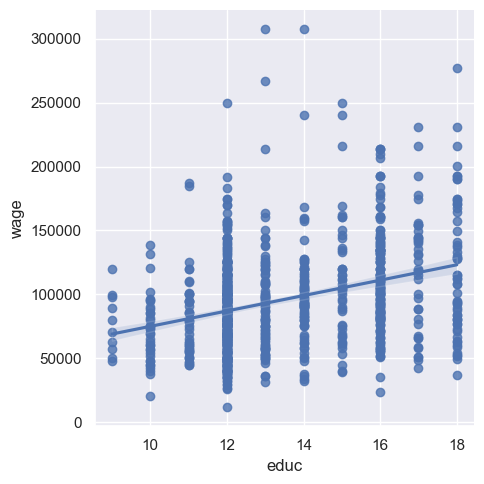

In [26]:
# motivation:
sns.lmplot(data=df, x='educ', y='wage')
plt.show()

- lets verify if adding a `educ**2` term helps
- hypothesis: wage might inc at a more rapid rate for highly educated people

In [40]:
reg3 = smf.ols(formula= "wage ~ IQ + age + educ +   I(educ**2)+ C(black) + C(married)", data=df).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     35.94
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           3.06e-39
Time:                        15:16:23   Log-Likelihood:                -11147.
No. Observations:                 935   AIC:                         2.231e+04
Df Residuals:                     928   BIC:                         2.234e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.242e+05   5.46e+04     -2.276      0.023   -2.31e+05   -1.71e+04
C(black)[T.1]   -1.139e+04   3890.603     -2.928      0.003    -1.9e+04   -3757.230
C(married)[T.1]  1.723e+04   3903.023      4.415      0.000    9571.951    2.49e+04
IQ                416.7047     99.710      4.179      0.000     221.021     612.389
age              1997.1617    395.119      5.055      0.000    1221.731    2772.592
educ             1.001e+04   7363.088      1.359      0.174   -4442.745    2.45e+04
I(educ ** 2)     -198.7737    259.316     -0.767      0.444    -707.688     310.141
==============================================================================
Omnibus:                      210.540   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              607.856
Skew:                           1.122   Prob(JB):                    1.01e-132
Kurtosis:                       6.251   Cond. No.                     1.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- r sqrd dec
- p value for both educ and  I(educ**2) inc
- does not make sense for us to add to the model

### Interaction terms

- effect of educ on age for black
- effect of educ on age for married

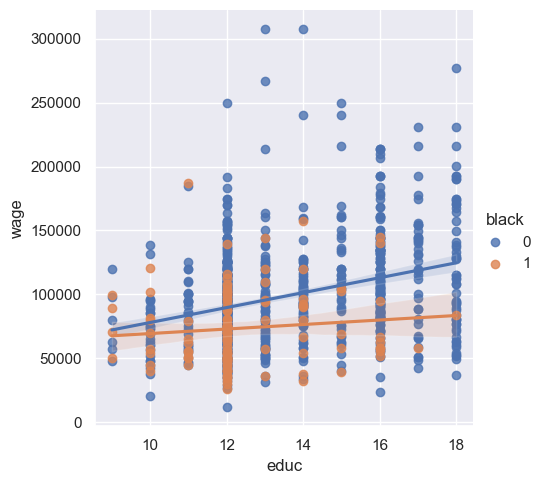

In [28]:
# motivation:
sns.lmplot(data=df, x='educ', y='wage', hue='black')
plt.show()

- for non black people there seems to be some wage discrimination
    - but this might be that non black people might have higher educ in this data, hence the high wage

- same for unmarried, but tha might be due to married people having higher educ in this data

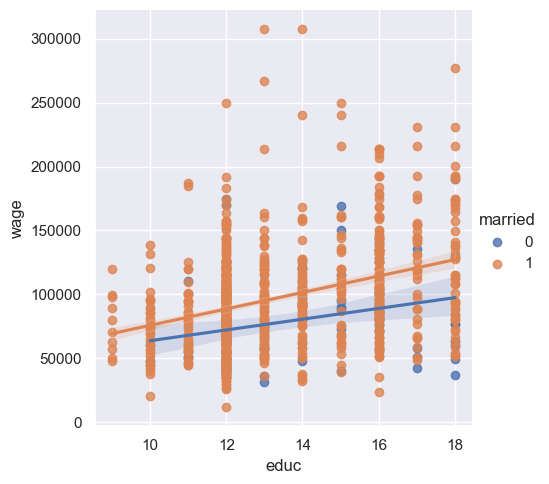

In [29]:
# motivation:
sns.lmplot(data=df, x='educ', y='wage', hue='married')
plt.show()

In [33]:
reg4 = smf.ols(formula= "lwage ~ IQ + educ +   I(educ * np.array(black)) + C(black) + I(educ * np.array(married)) + C(married)", data=df).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     32.26
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           2.22e-35
Time:                        15:06:00   Log-Likelihood:                -429.08
No. Observations:                 935   AIC:                             872.2
Df Residuals:                     928   BIC:                             906.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      10.3276      0.253     40.747      0.000       9.830      10.825
C(black)[T.1]                   0.2475      0.269      0.920      0.358      -0.281       0.776
C(married)[T.1]                 0.0356      0.257      0.138      0.890      -0.469       0.540
IQ                              0.0044      0.001      4.228      0.000       0.002       0.006
educ                            0.0329      0.018      1.826      0.068      -0.002       0.068
I(educ * np.array(black))      -0.0322      0.021     -1.517      0.130      -0.074       0.009
I(educ * np.array(married))     0.0130      0.018      0.707      0.480      -0.023       0.049
==============================================================================
Omnibus:                       42.824   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.433
Skew:                          -0.390   Prob(JB):                     1.02e-14
Kurtosis:                       4.023   Cond. No.                     2.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

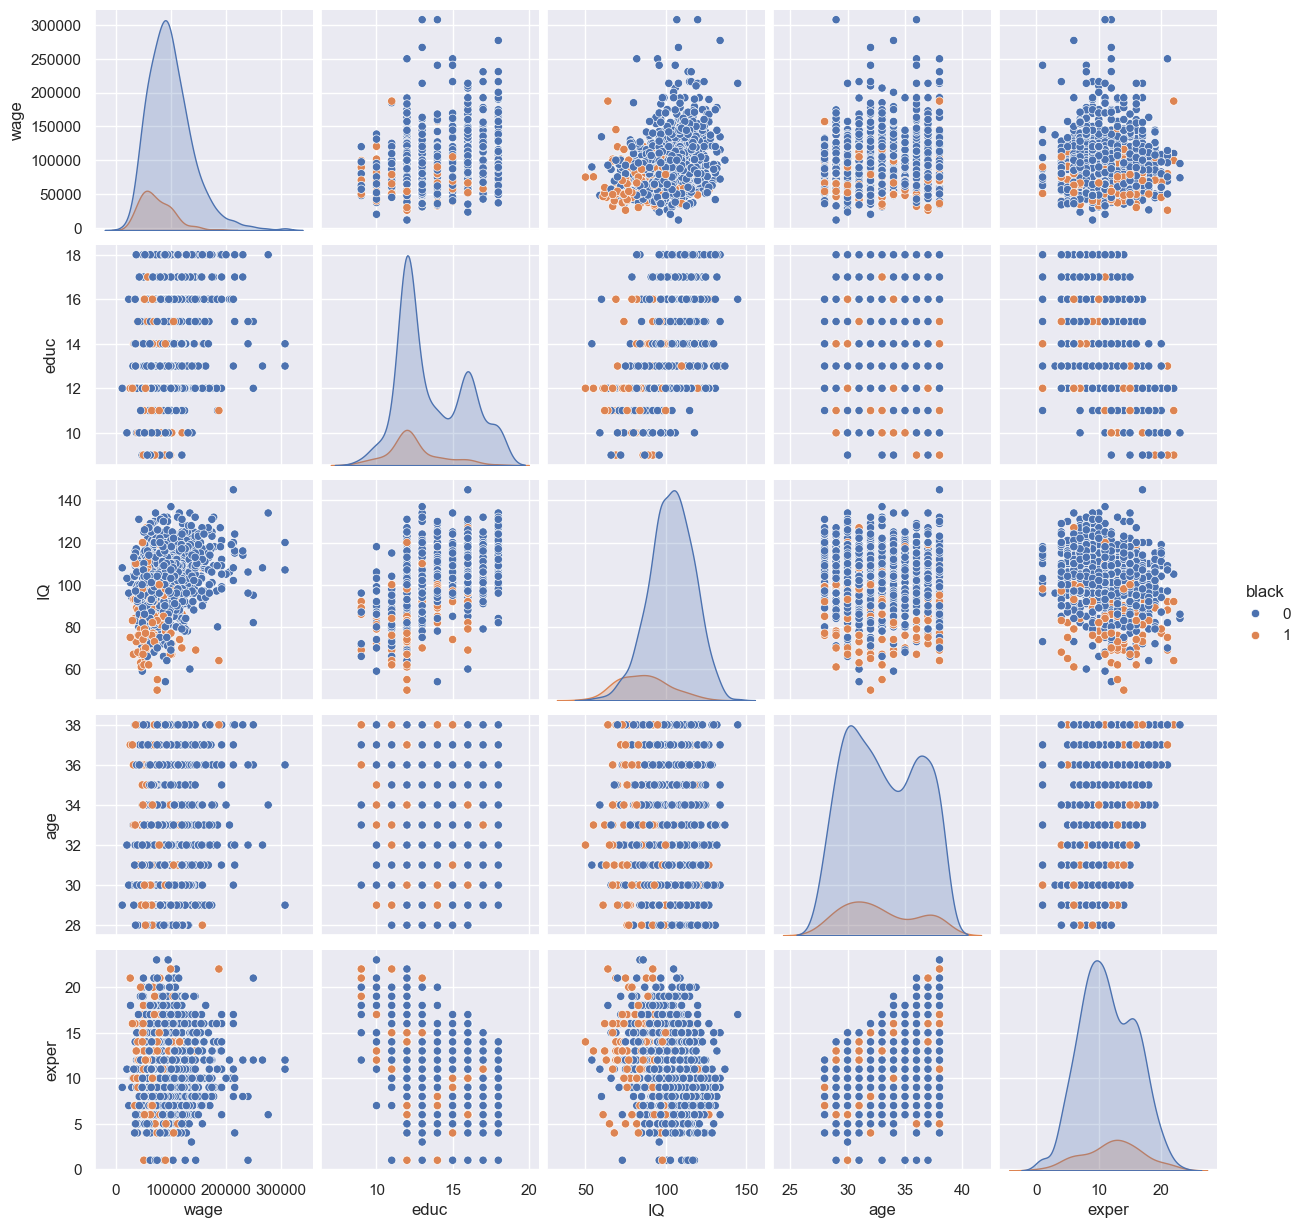

In [38]:
sns.pairplot(data=df[['wage', 'educ', 'IQ', 'age', 'exper', 'black']], hue="black");

- there is diff in IQ and educ for black vs non black, hence the discrimination
- IQ is highly corr w wage; IQ is -ve corr with black

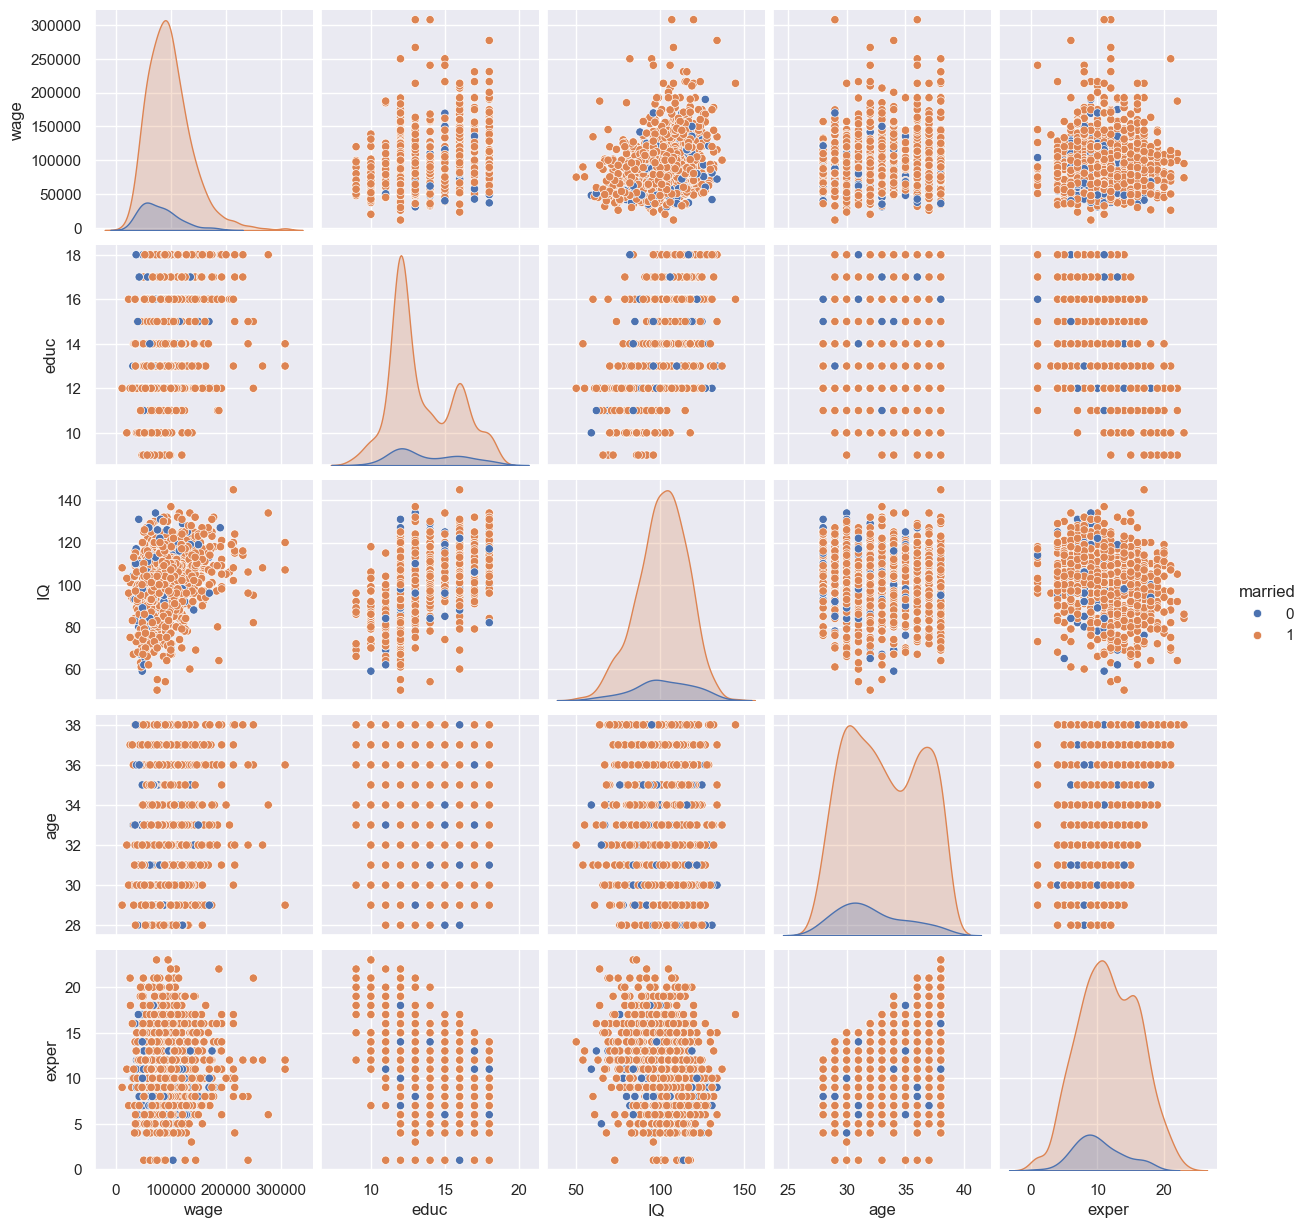

In [39]:
sns.pairplot(data=df[['wage', 'educ', 'IQ', 'age', 'exper', 'married']], hue="married");

for married - the diff is mostly on age and exper

It's worth noting that the process we're going throuhg is referred to as **feature engineering**. As you may have noticed, feature engineering is more of an art than a science and requires a combination of domain knowledge and expert opinion.

* Let's say we are satisfied with the results of reg2 and reg3. We can now take a look into other performance metrics for this model.


> In practice check for assumptions like heteroskedasticity, endgenity etc. before reporting these numbers

### Model evaluation with Statsmodels api

Now let's look into some of the most common evaluation metrics for regression analysis. https://www.statsmodels.org/dev/tools.html

In [41]:
from statsmodels.tools import eval_measures

In [42]:
# predicted valued for wage
predictions = reg3.predict()
predictions[0:10]

array([ 85190.43376449, 132273.39981133, 105114.07514569,  88437.70956904,
        77828.83485424, 109137.96350235,  53859.20049828, 132187.0380582 ,
       116598.72703878,  96009.65175602])

In [43]:
# actual values for wage
actuals = df.wage
np.array(actuals[0:10])

array([ 76900.,  80800.,  82500.,  65000.,  56200., 140000.,  60000.,
       108100., 115400., 100000.])

In [44]:
np.array(reg3.resid[0:10])

array([ -8290.43376449, -51473.39981133, -22614.07514569, -23437.70956904,
       -21628.83485424,  30862.03649765,   6140.79950172, -24087.0380582 ,
        -1198.72703878,   3990.34824398])

In [45]:
# MAE
eval_measures.meanabs(actuals, predictions)

27379.159332007424

In [46]:
# RMSE
eval_measures.rmse(actuals, predictions)

36405.048470780974

In [47]:
# Root Mean Squared Percentage Error: RMSPE
eval_measures.rmspe(actuals, predictions) # interpret as %

5.418190610726411

So the errors are 54% off on average!

---
### Using statsmodels.api

We could use statsmodels.api, the **numpy array** version instead of the **formula** versin of stastmodels. Here is the documentation: https://www.statsmodels.org/stable/index.html
I personally recommned you using the formula api if you want to do heavy econometrics. The formula version is much more flexible when it comes to feature engineering.

In [48]:
import statsmodels.api as sm

In [49]:
df.head()

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,lwage
0,76900.0,40.0,93.0,12.0,11.0,2.0,31.0,1,0,8.0,11.250261
1,80800.0,50.0,119.0,18.0,11.0,16.0,37.0,1,0,14.0,11.299732
2,82500.0,40.0,108.0,14.0,11.0,9.0,33.0,1,0,14.0,11.320554
3,65000.0,40.0,96.0,12.0,13.0,7.0,32.0,1,0,12.0,11.082143
4,56200.0,40.0,74.0,11.0,14.0,5.0,34.0,1,0,6.0,10.936672


In [50]:
# reg 5 (using formula)
reg5_formula = smf.ols(formula='wage ~ hours + IQ + educ + exper + tenure + age + married + black + meduc', data=df).fit()
reg5_formula.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     26.76
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           2.58e-41
Time:                        18:22:12   Log-Likelihood:                -11136.
No. Observations:                 935   AIC:                         2.229e+04
Df Residuals:                     925   BIC:                         2.234e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -7.241e+04   1.79e+04     -4.051      0.000   -1.07e+05   -3.73e+04
married[T.1]  1.685e+04   3873.155      4.349      0.000    9244.984    2.44e+04
black[T.1]   -1.099e+04   3886.857     -2.828      0.005   -1.86e+04   -3365.256
hours         -313.8567    166.081     -1.890      0.059    -639.795      12.082
IQ             373.8446     99.258      3.766      0.000     179.047     568.642
educ          5152.0987    728.253      7.075      0.000    3722.879    6581.318
exper          948.9550    368.184      2.577      0.010     226.382    1671.528
tenure         529.4372    246.546      2.147      0.032      45.583    1013.291
age           1074.9783    465.555      2.309      0.021     161.312    1988.645
meduc          994.7300    463.031      2.148      0.032      86.017    1903.443
==============================================================================
Omnibus:                      242.023   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              798.759
Skew:                           1.238   Prob(JB):                    3.56e-174
Kurtosis:                       6.790   Cond. No.                     1.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
# reg 5: numpy version

# first we need to drop target features
X = df.drop(["wage", "lwage"], axis=1)
# add const column for intercept
X = sm.add_constant(X)
X.head()

,const,hours,IQ,educ,exper,tenure,age,married,black,meduc
0,1.0,40.0,93.0,12.0,11.0,2.0,31.0,1,0,8.0
1,1.0,50.0,119.0,18.0,11.0,16.0,37.0,1,0,14.0
2,1.0,40.0,108.0,14.0,11.0,9.0,33.0,1,0,14.0
3,1.0,40.0,96.0,12.0,13.0,7.0,32.0,1,0,12.0
4,1.0,40.0,74.0,11.0,14.0,5.0,34.0,1,0,6.0


In [52]:
reg5_numpy = sm.OLS(df['wage'], X).fit()
reg5_numpy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     26.76
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           2.58e-41
Time:                        18:22:58   Log-Likelihood:                -11136.
No. Observations:                 935   AIC:                         2.229e+04
Df Residuals:                     925   BIC:                         2.234e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.241e+04   1.79e+04     -4.051      0.000   -1.07e+05   -3.73e+04
hours       -313.8567    166.081     -1.890      0.059    -639.795      12.082
IQ           373.8446     99.258      3.766      0.000     179.047     568.642
educ        5152.0987    728.253      7.075      0.000    3722.879    6581.318
exper        948.9550    368.184      2.577      0.010     226.382    1671.528
tenure       529.4372    246.546      2.147      0.032      45.583    1013.291
age         1074.9783    465.555      2.309      0.021     161.312    1988.645
married     1.685e+04   3873.155      4.349      0.000    9244.984    2.44e+04
black      -1.099e+04   3886.857     -2.828      0.005   -1.86e+04   -3365.256
meduc        994.7300    463.031      2.148      0.032      86.017    1903.443
==============================================================================
Omnibus:                      242.023   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              798.759
Skew:                           1.238   Prob(JB):                    3.56e-174
Kurtosis:                       6.790   Cond. No.                     1.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now, let's do a more complex (feature engineered) model: $$log(wage)= \beta_0 + \beta_1 educ + \beta_2 educ^2 + \beta_3 married + \beta_4 black + \beta_5 married*black + \beta_6 log(exper) + u$$

In [56]:
reg6_formula = smf.ols(formula="np.log(wage) ~ educ + I(educ**2) + C(married) + C(black) + I(np.array(married)*np.array(black)) + np.log(exper)", data=df).fit()
reg6_formula.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     32.96
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           4.02e-36
Time:                        18:26:04   Log-Likelihood:                -427.32
No. Observations:                 935   AIC:                             868.6
Df Residuals:                     928   BIC:                             902.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  9.2915      0.544     17.076      0.000       8.224      10.359
C(married)[T.1]                            0.1991      0.045      4.436      0.000       0.111       0.287
C(black)[T.1]                             -0.2385      0.100     -2.381      0.017      -0.435      -0.042
educ                                       0.1705      0.076      2.250      0.025       0.022       0.319
I(educ ** 2)                              -0.0037      0.003     -1.369      0.171      -0.009       0.002
I(np.array(married) * np.array(black))     0.0363      0.108      0.336      0.737      -0.175       0.248
np.log(exper)                              0.1388      0.029      4.848      0.000       0.083       0.195
==============================================================================
Omnibus:                       36.550   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.447
Skew:                          -0.352   Prob(JB):                     2.48e-12
Kurtosis:                       3.937   Cond. No.                     8.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now let's do the numpy version! first we need to prepare our X dataframe.

In [57]:
X = df[['educ', 'exper', 'married','black']]
X.head()

,educ,exper,married,black
0,12.0,11.0,1,0
1,18.0,11.0,1,0
2,14.0,11.0,1,0
3,12.0,13.0,1,0
4,11.0,14.0,1,0


In [58]:
X['educ2'] = X['educ']**2
X['married*black'] = np.array(X['married']) * np.array(X['black'])
X['log_exper'] = np.log(X['exper'])
X = sm.add_constant(X)
X.head()


,const,educ,exper,married,black,educ2,married*black,log_exper
0,1.0,12.0,11.0,1,0,144.0,0,2.397895
1,1.0,18.0,11.0,1,0,324.0,0,2.397895
2,1.0,14.0,11.0,1,0,196.0,0,2.397895
3,1.0,12.0,13.0,1,0,144.0,0,2.564949
4,1.0,11.0,14.0,1,0,121.0,0,2.639057


In [59]:
X=X.drop('exper', axis=1)


In [60]:
reg6_numpy = sm.OLS(np.log(df['wage']), X ).fit()
reg6_numpy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     32.96
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           4.02e-36
Time:                        18:28:51   Log-Likelihood:                -427.32
No. Observations:                 935   AIC:                             868.6
Df Residuals:                     928   BIC:                             902.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.2915      0.544     17.076      0.000       8.224      10.359
educ              0.1705      0.076      2.250      0.025       0.022       0.319
married           0.1991      0.045      4.436      0.000       0.111       0.287
black            -0.2385      0.100     -2.381      0.017      -0.435      -0.042
educ2            -0.0037      0.003     -1.369      0.171      -0.009       0.002
married*black     0.0363      0.108      0.336      0.737      -0.175       0.248
log_exper         0.1388      0.029      4.848      0.000       0.083       0.195
==============================================================================
Omnibus:                       36.550   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.447
Skew:                          -0.352   Prob(JB):                     2.48e-12
Kurtosis:                       3.937   Cond. No.                     8.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""